# Theory of weight increase in the hidden layer

In [1]:
import sys
sys.path.append('../')
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns

%matplotlib inline
sns.set(font_scale=3.0)

In [2]:
from network import MinaNetwork

## Let's see how this distribution depends on x and Kr

In [3]:
N_input = 100 # Inputs size
N_recurrent = 100  # C3 size
v = 25.0   # Input - C3 connection
b = 25.0   # Input - C1 connection
Kr = 0.7  # Recurrent self-inhibition gain
Ki = 0.0 # Input - C3 inhibition
Ci = 1.0  # Inhibition from the input to C1
Cr = 1.0  # Inhibition from C3 to C1
p = 1.0   # Sparness parameter

# Dynamical parameters
theta = 0.0
phi = 0

# Patternsnp
number_of_patterns = 10
sparsity = 10.0


nn = MinaNetwork(n_input=N_input, n_recurrent=N_recurrent, p=p, v=v, b=b, Ki=Ki, Kr=Kr, Ci=Ci, Cr=Cr,
                 theta=theta, phi=phi, uniform_w=False)

nn.build_patterns_dictionary(sparsity=sparsity, number_of_patterns=number_of_patterns)


In [4]:
recurrent = np.dot(nn.w, nn.patterns_dictionary[0])
print('recurrent mean', recurrent.mean())

recurrent mean 4.9315265593


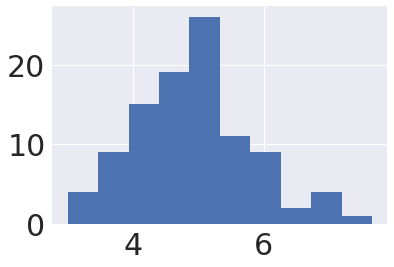

In [5]:
plt.hist(recurrent);

In [6]:
sequence1 = [0, 1, 2, 3, 4]
epsilon = 0.1
training_time = 100
verbose = False

quantities = nn.train_network(epsilon=epsilon, training_time=training_time, pre_synaptic_rule=True,
                              sequence=sequence1, verbose=verbose, save_quantities=True)

In [7]:
quantities.keys()

dict_keys(['m', 'a', 'w', 'excitation_r', 'excitation_out', 'inhibition_r', 'inhibition_out', 'input_r', 'input_out', 'z_r', 'z_out'])

In [8]:
inhibition= quantities['inhibition_r']

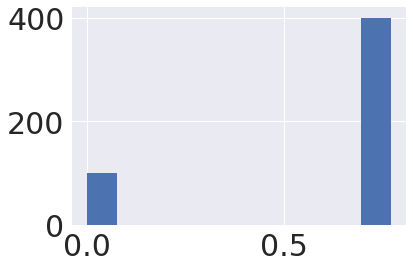

In [9]:
plt.hist(inhibition);

In [10]:
np.unique(inhibition, return_counts=True)

(array([ 0.  ,  0.7 ,  0.77]), array([100, 200, 200]))

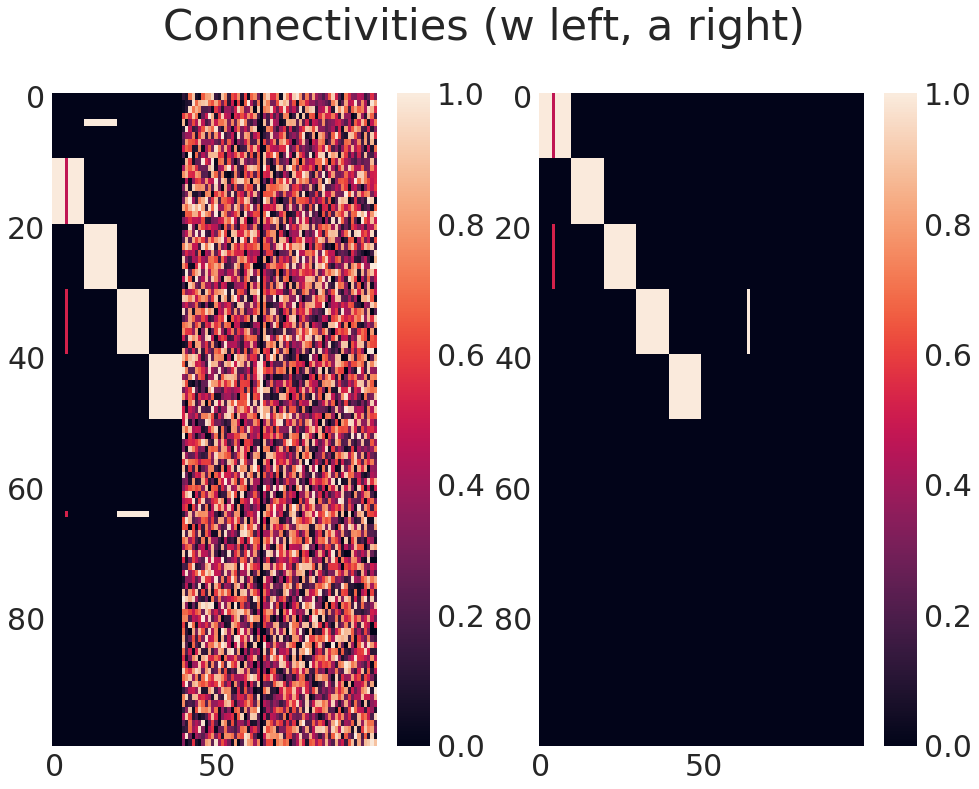

In [11]:
nn.plot_weight_matrices()

## Let's see if the inhibition depends on the size of the network
I think it should not

In [38]:
N_input = 100 # Inputs size
N_recurrent = 100  # C3 size
v = 25.0   # Input - C3 connection
b = 25.0   # Input - C1 connection
Kr = 0.7  # Recurrent self-inhibition gain
Ki = 0.0 # Input - C3 inhibition
Ci = 1.0  # Inhibition from the input to C1
Cr = 0.7  # Inhibition from C3 to C1
p = 1.0   # Sparness parameter

# Dynamical parameters
theta = 0.0
phi = 0

# Patternsnp
number_of_patterns = 10
sparsity = 10.0


In [39]:
n_vector = np.arange(100, 1100, 100, dtype=int)
inhibition_history = []
predictive = []
neurons_per_pattern = []
m_history = []
success_history = []

for n in n_vector:
    print('n', n)
    nn = MinaNetwork(n_input=n, n_recurrent=n, p=p, v=v, b=b, Ki=Ki, Kr=Kr, Ci=Ci, Cr=Cr,
                     theta=theta, phi=phi, uniform_w=False)

    nn.build_patterns_dictionary(sparsity=sparsity, number_of_patterns=number_of_patterns)

    sequence = [0, 1, 2, 3, 4]
    epsilon = 0.1
    training_time = 100
    verbose = False

    quantities = nn.train_network(epsilon=epsilon, training_time=training_time, pre_synaptic_rule=True,
                                  sequence=sequence, verbose=verbose, save_quantities=True)
    
    success = nn.test_recall(sequence)
    print('success', success)
    
    inhibition = quantities['inhibition_r']
    inhibition_history.append(np.copy(inhibition))
    predictive.append(nn.neurons_per_pattern * Kr)
    neurons_per_pattern.append(nn.neurons_per_pattern)
    m_history.append(np.mean(quantities['m']))
    success_history.append(success)

n 100
success 100.0
n 200
success 100.0
n 300
success 100.0
n 400
success 100.0
n 500
success 100.0
n 600
success 100.0


In [41]:
success_history = [x / 100.0 for x in success_history]
x = [np.mean(x) for x in inhibition_history]
y = [np.unique(x) for x in inhibition_history ]

In [42]:
y

[array([ 0.  ,  0.7 ,  0.77,  1.05]),
 array([ 0. ,  0.7]),
 array([ 0. ,  0.7]),
 array([ 0. ,  0.7]),
 array([ 0. ,  0.7]),
 array([ 0. ,  0.7])]

In [43]:
nn.Kr * 80.0

0.9333333333333332

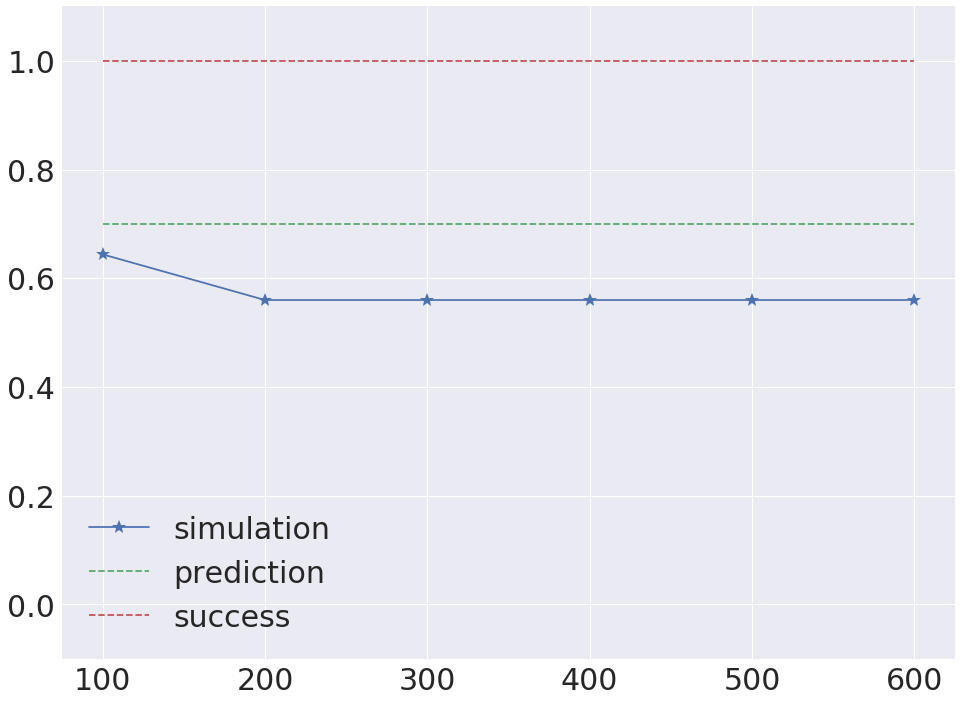

In [44]:
fig = plt.figure(figsize=(16, 12))
ax = fig.add_subplot(111)

ax.plot(n_vector, x, '*-', markersize=15, label='simulation')
ax.plot(n_vector, Kr * np.ones(len(n_vector)), '--', markersize=15, label='prediction')
ax.plot(n_vector, success_history, '--', markersize=15, label='success')

ax.set_ylim([-0.1, 1.1])
ax.legend();

We can see that in this case the inhibition does not depend on the size of the network. There is a difference because the inhibition is zero at the beggining of each sequence training because there is no pre-active m at that point in time (m being the number of units active in C3).

## How does the matrix change for the connections among the reservoir units
I need to compare how the matrix was at the beggining for how the matrix was at the end

In [127]:
N_input = 20 # Inputs size
N_recurrent = 20  # C3 size
v = 25.0   # Input - C3 connection
b = 25.0   # Input - C1 connection
Kr = 0.5  # Recurrent self-inhibition gain
Ki = 0.0 # Input - C3 inhibition
Ci = 1.0  # Inhibition from the input to C1
Cr = 0.7  # Inhibition from C3 to C1
p = 1.0   # Sparness parameter

# Dynamical parameters
theta = 0.0
phi = 0

# Patternsnp
number_of_patterns = 10
sparsity = 10.0

nn = MinaNetwork(n_input=N_input, n_recurrent=N_recurrent, p=p, v=v, b=b, Ki=Ki, Kr=Kr, Ci=Ci, Cr=Cr,
                 theta=theta, phi=phi, uniform_w=False)

nn.build_patterns_dictionary(sparsity=sparsity, number_of_patterns=number_of_patterns)

sequence = [0, 1, 2, 3, 4]
epsilon = 0.1
training_time = 100
verbose = False

n_non_hidden = len(sequence) * nn.neurons_per_pattern
w_initial = np.copy(nn.w)
w_initial[:, :n_non_hidden] = 0.0

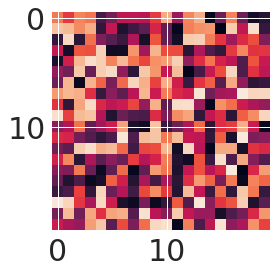

In [128]:
plt.imshow(nn.w)

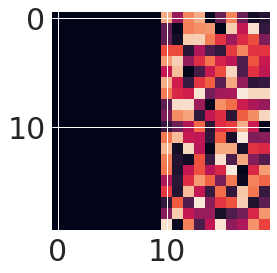

In [129]:
plt.imshow(w_initial);

Now we train the matrix

In [130]:
quantities = nn.train_network(epsilon=epsilon, training_time=training_time, pre_synaptic_rule=True,
                              sequence=sequence, verbose=verbose, save_quantities=False)

success = nn.test_recall(sequence)

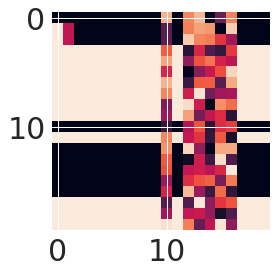

In [131]:
w_final = np.copy(nn.w)
plt.imshow(w_final);

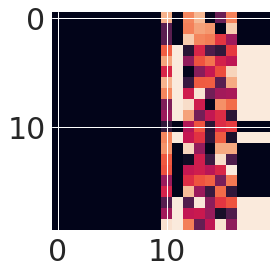

In [132]:
w_final[:, :n_non_hidden] = 0.0
plt.imshow(w_final)

norm of the difference 4.39031548111
cosine sim 0.879175534401


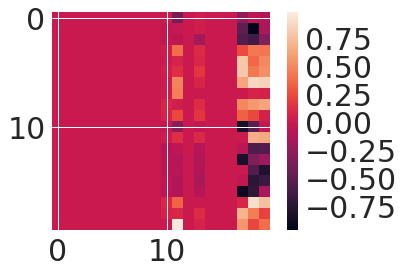

In [133]:
aux = w_final - w_initial
norm = np.linalg.norm(w_final - w_initial)
cos_sim = np.dot(w_initial.flatten(), w_final.flatten()) / (np.linalg.norm(w_final) * np.linalg.norm(w_initial))

plt.imshow(aux)
plt.colorbar();
print('norm of the difference', norm)
print('cosine sim', cos_sim)

#### Systematic testing
Now we can test sytematic how this varies with the recurrent strength. How this should work? if the recurrent force is strong. 

* If Kr is big (greater than 0.5) what should happen is that most of the weights are not going to be modified (the normal distribution of the non-input aided excitatory segnths is centered left of 0) and therefore **there should not be a lot of change**
* If Kr is small (smaller than 0.5) most of the self-excitatory connections are going to grow themselves and the matrix should changea lot.

What is the sweet-spot? from this vantage point it seems that there should be enough weight change to create some structure in the non-hidden layer but not enough changes on the w that the successful recall is destroyed.

In [152]:
N_input = 100 # Inputs size
N_recurrent = 100  # C3 size
v = 25.0   # Input - C3 connection
b = 25.0   # Input - C1 connection
Kr = 0.7  # Recurrent self-inhibition gain
Ki = 0.0 # Input - C3 inhibition
Ci = 1.0  # Inhibition from the input to C1
Cr = 0.7  # Inhibition from C3 to C1
p = 1.0   # Sparness parameter

# Dynamical parameters
theta = 0.0
phi = 0

# Patternsnp
number_of_patterns = 10
sparsity = 10.0

# Learning parameters
sequence = [0, 1, 2, 3, 4]
epsilon = 0.1
training_time = 100
verbose = False

In [153]:
Kr_vector = np.arange(0.0, 1.0, 0.05)
norm_history = []
success_history = []
activity_history = []

for Kr in Kr_vector:
    nn = MinaNetwork(n_input=N_input, n_recurrent=N_recurrent, p=p, v=v, b=b, Ki=Ki, Kr=Kr, Ci=Ci, Cr=Cr,
                 theta=theta, phi=phi, uniform_w=False)
    
    nn.build_patterns_dictionary(sparsity=sparsity, number_of_patterns=number_of_patterns)
    
    # Copy the first neuron
    n_non_hidden = len(sequence) * nn.neurons_per_pattern
    w_initial = np.copy(nn.w)
    w_initial[:, :n_non_hidden] = 0.0
    
    # Train and test the network
    quantities = nn.train_network(epsilon=epsilon, training_time=training_time, pre_synaptic_rule=True,
                                  sequence=sequence, verbose=verbose, save_quantities=True)
    success = nn.test_recall(sequence)
    
    # Store mean activities in the recurrent layer
    z_r_end = np.mean(quantities['z_r'], axis=0)
    explicit_nn_length = nn.neurons_per_pattern * (sequence[-1] + 1)
    z_r_non_hidden = z_r_end[:explicit_nn_length]
    z_hidden = z_r_end[explicit_nn_length:]
    
    w_final = np.copy(nn.w)
    w_final[:, :n_non_hidden] = 0.0
    norm = np.linalg.norm(w_final - w_initial)
    cos_sim = np.dot(w_initial.flatten(), w_final.flatten()) / (np.linalg.norm(w_final) * np.linalg.norm(w_initial))
    
    success_history.append(success / 100.0)
    norm_history.append(1.0 - cos_sim)
    activity_history.append(z_hidden.mean())

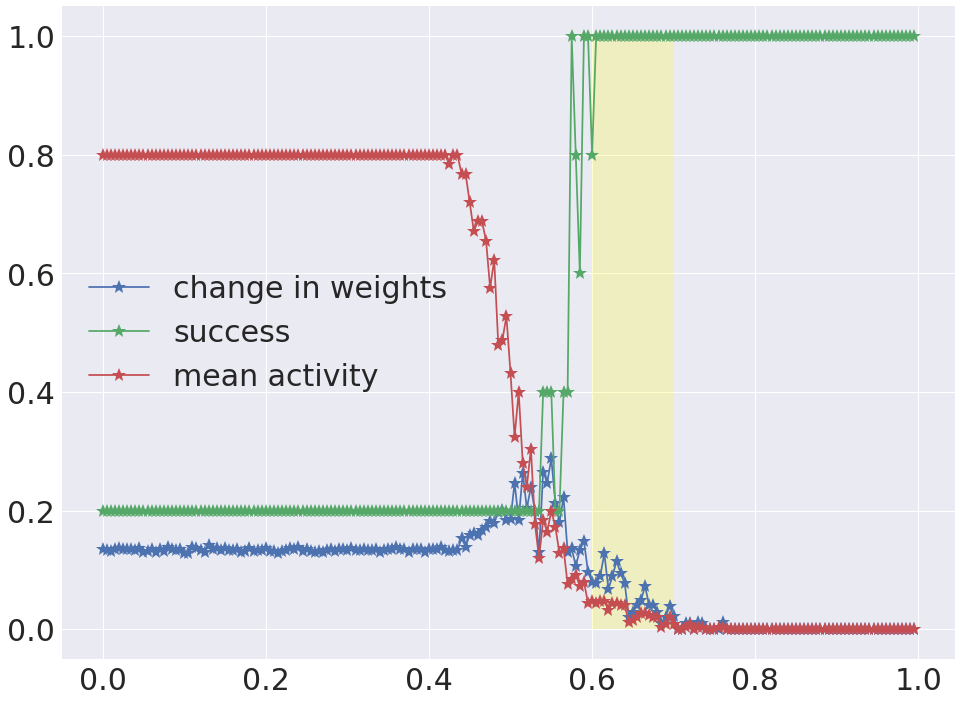

In [154]:
fig = plt.figure(figsize=(16, 12))
ax = fig.add_subplot(111)
ax.plot(Kr_vector, norm_history, '*-', markersize=15, label='change in weights');
ax.plot(Kr_vector, success_history, '*-', markersize=15, label='success')
ax.plot(Kr_vector, activity_history, '*-', markersize=15, label='mean activity')

ax.fill_between(np.arange(0.6, 0.75, 0.1), 0.0, 1.0, alpha=0.2, facecolor='yellow', interpolate=False)

ax.legend();